# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [172]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()
%matplotlib inline

In [173]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [174]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [175]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en")


In [176]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en")


In [177]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        bitcoin_sentiments.append({

            "Compound": compound,
            "Negative": negative,
            "Neutral": neutral,
            "Positive": positive,
            "Text": text
        })
        
    except AttributeError:
        pass
    

btc_df = pd.DataFrame(bitcoin_sentiments)


cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]
btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i..."


In [178]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        
        ethereum_sentiments.append({

            "Compound": compound,
            "Negative": negative,
            "Neutral": neutral,
            "Positive": positive,
            "Text": text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...
4,0.4404,0.000,0.909,0.091,NFTs (non-fungible tokens) — or scarce digital...


In [179]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.248211,0.019056,0.896889,0.084000
std,0.402651,0.035630,0.085635,0.092882
min,-0.503700,0.000000,0.647000,0.000000
25%,0.000000,0.000000,0.868750,0.010500
50%,0.213950,0.000000,0.912500,0.061000
75%,0.583050,0.024000,0.952250,0.110000
max,0.921700,0.114000,1.000000,0.353000


In [180]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.204340,0.005950,0.941050,0.053000
std,0.290233,0.026609,0.063179,0.056199
min,-0.340000,0.000000,0.818000,0.000000
25%,0.000000,0.000000,0.883500,0.000000
50%,0.012900,0.000000,0.949500,0.046500
75%,0.453775,0.000000,1.000000,0.096500
max,0.709600,0.119000,1.000000,0.144000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC

Q: Which coin had the highest compound score?

A: BTC

Q. Which coin had the highest positive score?

A: BTC

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [181]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [182]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
print(sw)

{'until', 'about', 'a', 'yourself', 'only', 'or', 'my', 'for', 'as', 'into', "you'd", 'just', 'itself', 'does', 'mightn', 'against', 'during', "hasn't", "you're", 'an', 'with', 'myself', 'isn', "won't", "you'll", 'ourselves', 'very', 'at', 'shouldn', 'his', 'had', 's', 'haven', 'most', "mightn't", 'both', 'be', 'ain', 'won', 'further', 've', 'who', 'do', "hadn't", 'to', 'on', 'wouldn', 'but', 'once', "shouldn't", 'in', "she's", 'through', "haven't", 'how', 'were', "wouldn't", 'ours', 'where', 'he', "aren't", 'below', 'is', "couldn't", 'out', 'each', 'needn', 'it', 'above', 'by', 'nor', 'from', 'this', 'you', "weren't", 'she', 'which', "it's", "shan't", 'has', 'between', 'your', "you've", 'after', 'am', 'why', 'doing', 'and', 'its', 'o', 'whom', 'any', 'yourselves', "doesn't", 'what', 'off', 'same', 'because', 'up', 'of', 'd', 'not', 'will', "don't", 'hers', 'other', 'can', 'didn', "didn't", 'than', 'him', 'i', 'y', "that'll", 'while', 'too', 'hasn', 'me', 'having', 'there', 'such', 'ma

In [183]:
# Complete the tokenizer function
def tokenizer(text, stop_words=[]):
    """Tokenizes text."""
     # Create a list of the words
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [184]:
# Create a new tokens column for bitcoin
btc_token = btc_df.copy()
btc_token['tokens'] = btc_token['Text'].apply(tokenizer)
btc_token.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,0.3182,0.000,0.909,0.091,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, wa, idle, ..."
1,0.3818,0.000,0.929,0.071,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.038,0.962,0.000,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.000,0.944,0.056,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.000,0.863,0.137,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, ha, acq..."


In [185]:
# Create a new tokens column for ethereum
eth_token = eth_df.copy()
eth_token['tokens'] = eth_token['Text'].apply(tokenizer)
eth_token.head()

,Compound,Negative,Neutral,Positive,Text,tokens
0,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,0.0000,0.000,1.000,0.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
4,0.4404,0.000,0.909,0.091,NFTs (non-fungible tokens) — or scarce digital...,"[nfts, nonfungible, token, scarce, digital, co..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [186]:
from collections import Counter
from nltk import ngrams

def bigram_counter(corpus): 
    processed = tokenizer(corpus)
    bigrams = (ngrams(processed, n=2))
    counted = dict(Counter(bigrams))
    return pd.DataFrame(list(counted.items()), columns=['bigram', 'count'])

In [187]:
# Generate the Bitcoin N-grams where N=2
btc_corpus = btc_df['Text'].sum()

btc_bigrams = bigram_counter(btc_corpus)
btc_bigrams = btc_bigrams.values.tolist()

In [188]:
# Generate the Ethereum N-grams where N=2
eth_corpus = eth_df['Text'].sum()

eth_bigrams = bigram_counter(eth_corpus)
eth_bigrams = eth_bigrams.values.tolist()

In [189]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [190]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(btc_corpus))

[('bitcoin', 13),
 ('cryptocurrency', 7),
 ('tesla', 5),
 ('elon', 4),
 ('billion', 4),
 ('said', 4),
 ('wa', 3),
 ('musk', 3),
 ('future', 3),
 ('dorsey', 3)]

In [140]:
# Get the top 10 words for Ethereum
token_count(tokenizer(eth_corpus))

[('ethereum', 13),
 ('reuters', 12),
 ('cryptocurrency', 8),
 ('week', 7),
 ('high', 7),
 ('bitcoin', 6),
 ('record', 6),
 ('february', 5),
 ('hit', 5),
 ('ha', 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

def cloud(text):
    wc = WordCloud().generate(text)
    plt.imshow(wc)

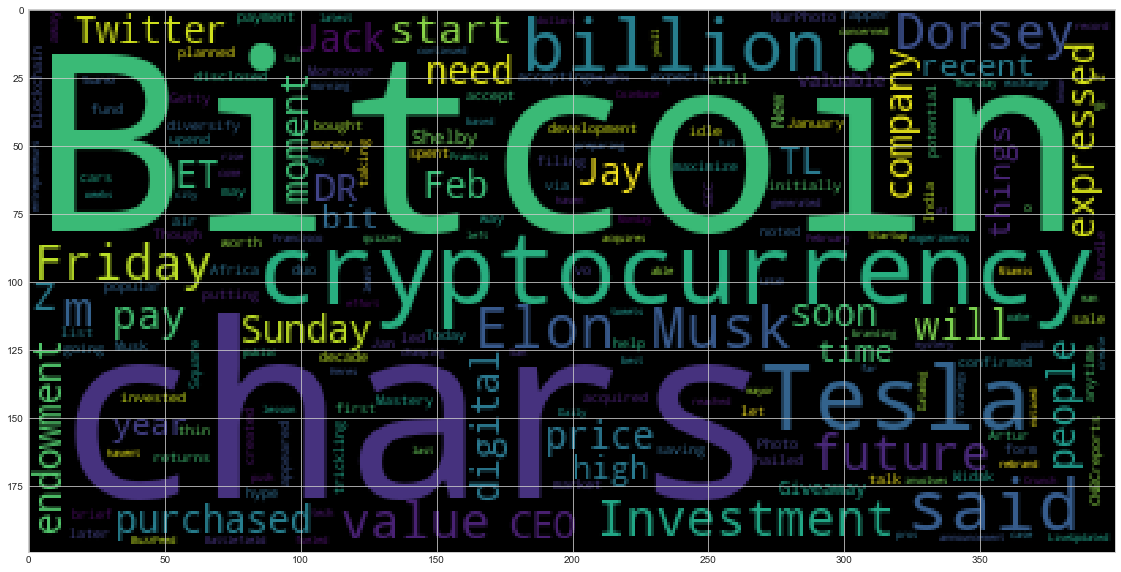

In [147]:
# Generate the Bitcoin word cloud
cloud(btc_corpus)

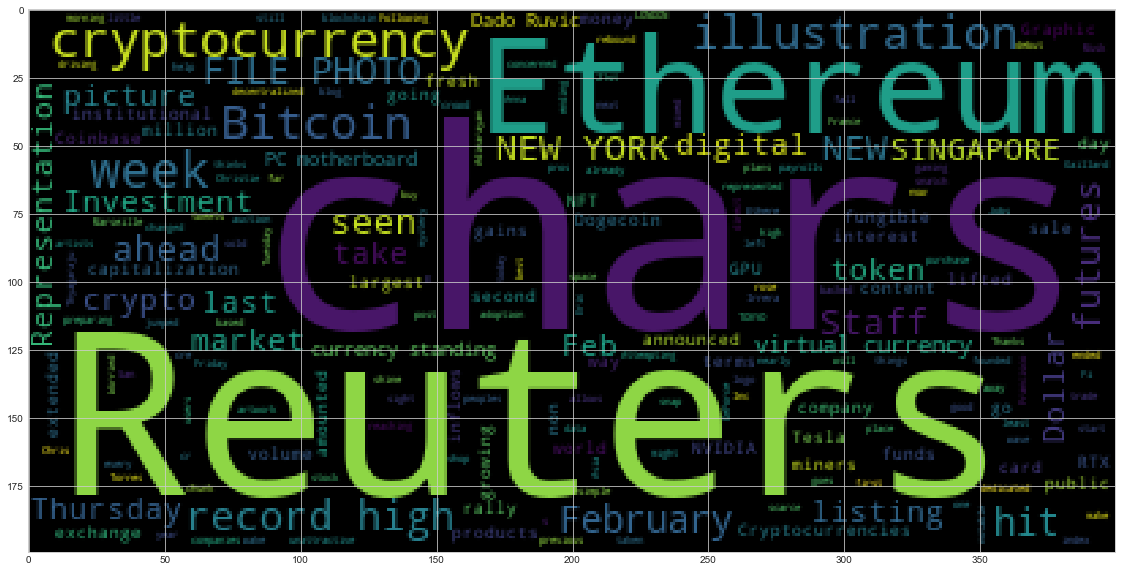

In [148]:
# Generate the Ethereum word cloud
cloud(eth_corpus)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [149]:
import spacy
from spacy import displacy

In [151]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [152]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [153]:
# Concatenate all of the bitcoin text together
btc_corpus

'Elon Musks cryptocurrency hype was more than just idle talk. CNBCreports that Tesla not only bought $1.5 billion worth of Bitcoin to help diversify and maximize its returns, but will start taking pay… [+1182 chars]Tesla, led by Elon Musk, confirmed that it purchased about $ 1.5 billion in bitcoin in January and expects to start accepting it as a payment in the future.\xa0 | Photo by Artur Widak/NurPhoto via Getty… [+6118 chars]For a brief moment on Sunday, before Tesla said it had invested $1.5 billion in bitcoin and planned to let people use the cryptocurrency to pay for its cars, bitcoins price could be expressed with a … [+3302 chars]Twitter and Square CEO Jack Dorsey and rapper Jay Z have created an endowment to fund bitcoin development initially in Africa and India, Dorsey said Friday.\r\nThe duo is putting 500 bitcoin, which is … [+3984 chars]Today in an SEC filing, Tesla disclosed that it has acquired $1.5 billion in bitcoin, the popular cryptocurrency. Moreover, the company no

In [158]:
# Run the NER processor on all of the text
btc_document = nlp(btc_corpus)

# Add a title to the document
btc_document.user_data["title"] = "BTC NER"

In [162]:
# Render the visualization
displacy.render(btc_document, style='ent')

In [164]:
# List all Entities
for ent in btc_document.ents:
    print(ent.text + " " + ent.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
chars]Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
Bitcoin PERSON
first ORDINAL
more than a decade later DATE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
over $12,000 MONEY
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Alabamas PERSON

---

## Ethereum NER

In [165]:
# Concatenate all of the bitcoin text together
print(eth_corpus)

Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars]Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.
The cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars]FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration
TOKYO (Reuters) - E… [+472 chars]By Reuters Staff
FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration/Fi… [+1379 chars]NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.
Thanks to the Ethereum blo

In [169]:
# Run the NER processor on all of the text
eth_document = nlp(eth_corpus)

# Add a title to the document
eth_document.user_data["title"] = "ETH NER"

In [170]:
# Render the visualization
displacy.render(eth_document, style='ent')

In [171]:
# List all Entities
for ent in eth_document.ents:
    print(ent.text + " " + ent.label_)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
Friday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GP